<a href="https://colab.research.google.com/github/chitinglow/tidytuesdayProject/blob/main/MarioKart_WorldRecord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

records = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/drivers.csv')

In [2]:
print(f'Data dimension: {records.shape}')

for i in records.columns:
  print(f"Column: {i:20} | type: {str(records[i].dtypes):20} | missing values: {records[i].isna().sum():3d}")

Data dimension: (2334, 9)
Column: track                | type: object               | missing values:   0
Column: type                 | type: object               | missing values:   0
Column: shortcut             | type: object               | missing values:   0
Column: player               | type: object               | missing values:   0
Column: system_played        | type: object               | missing values:   0
Column: date                 | type: object               | missing values:   0
Column: time_period          | type: object               | missing values:   0
Column: time                 | type: float64              | missing values:   0
Column: record_duration      | type: int64                | missing values:   0


In [3]:
print(f'Data dimension: {drivers.shape}')

for i in drivers.columns:
  print(f"Column: {i:20} | type: {str(drivers[i].dtypes):8} | missing values: {drivers[i].isna().sum():3d}")

Data dimension: (2250, 6)
Column: position             | type: int64    | missing values:   0
Column: player               | type: object   | missing values:   0
Column: total                | type: int64    | missing values:   0
Column: year                 | type: int64    | missing values:   0
Column: records              | type: float64  | missing values: 1991
Column: nation               | type: object   | missing values: 125


In [4]:
# Checking different group count
for i in records.columns:
  if records[i].dtypes == np.object:
    print("\n")
    print(records[i].value_counts())



Wario Stadium            201
Toad's Turnpike          196
D.K.'s Jungle Parkway    180
Frappe Snowland          180
Rainbow Road             179
Kalimari Desert          169
Yoshi Valley             160
Mario Raceway            160
Royal Raceway            149
Choco Mountain           148
Luigi Raceway            147
Sherbet Land             143
Koopa Troopa Beach        89
Banshee Boardwalk         83
Moo Moo Farm              81
Bowser's Castle           69
Name: track, dtype: int64


Three Lap     1211
Single Lap    1123
Name: type, dtype: int64


No     1447
Yes     887
Name: shortcut, dtype: int64


Penev       371
MR          351
Dan         201
MJ          197
Booth       141
           ... 
Igor V        1
Daniel L      1
Raffy         1
ABE           1
Allen C       1
Name: player, Length: 65, dtype: int64


PAL     1639
NTSC     695
Name: system_played, dtype: int64


1997-08-30    44
1997-05-27    44
1998-03-13    39
1997-03-10    30
2020-06-11    27
              ..
1999-

In [5]:
for i in drivers.columns:
  if drivers[i].dtypes == np.object:
    print("\n")
    print(drivers[i].value_counts())



Patricio     25
Kyman        25
Habrich      25
Marcos       25
Michael F    25
             ..
Nathan       25
Lucas O      25
Launspach    25
Jonesy       25
Allen C      25
Name: player, Length: 90, dtype: int64


USA            1000
Australia       225
Canada          200
Netherlands     175
UK              175
Brazil          100
Germany         100
France           25
Croatia          25
Norway           25
Ireland          25
Slovenia         25
Austria          25
Name: nation, dtype: int64


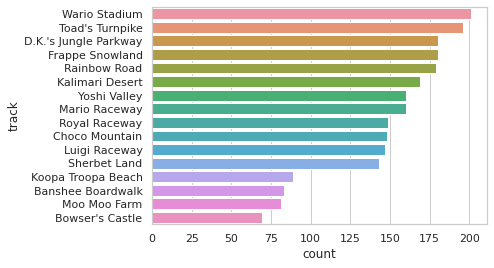

In [6]:
# Checking different group count
sns.countplot(y="track",
              order = records['track'].value_counts().index, 
              data=records)

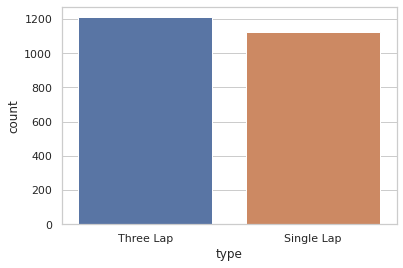

In [7]:
# Checking different group count
sns.countplot(x="type",
              order = records['type'].value_counts().index, 
              data=records)

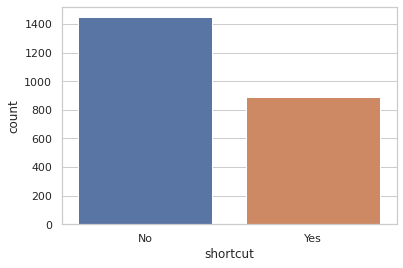

In [8]:
# Usings shortcut or not
sns.countplot(x="shortcut",
              order = records['shortcut'].value_counts().index, 
              data=records)

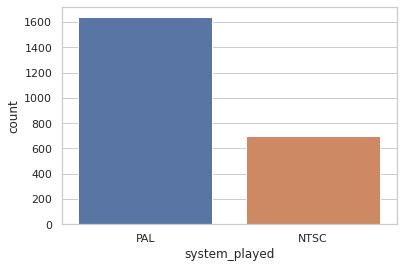

In [9]:
sns.countplot(x="system_played",
              order = records['system_played'].value_counts().index, 
              data=records)

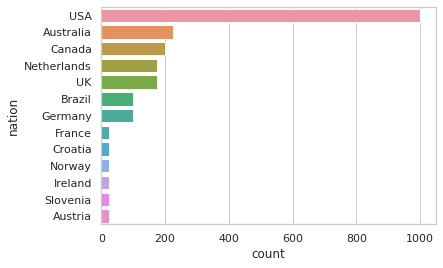

In [10]:
# Record for each nation
sns.countplot(y="nation",
              order = drivers['nation'].value_counts().index, 
              data=drivers)

## How did the records develop over time

In [11]:
# Convert date string to date format (YMD)
records['date'] = pd.to_datetime(records['date'], format="%Y-%m-%d")
records['year'] = records['date'].dt.year
records['month'] = records['date'].dt.month
records['weekday']= records['date'].dt.day_name()
records.head()

,track,type,shortcut,player,system_played,date,time_period,time,record_duration,year,month,weekday
0,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-15,2M 12.99S,132.99,1,1997,2,Saturday
1,Luigi Raceway,Three Lap,No,Booth,NTSC,1997-02-16,2M 9.99S,129.99,0,1997,2,Sunday
2,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-16,2M 8.99S,128.99,12,1997,2,Sunday
3,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-28,2M 6.99S,126.99,7,1997,2,Friday
4,Luigi Raceway,Three Lap,No,Gregg G,NTSC,1997-03-07,2M 4.51S,124.51,54,1997,3,Friday


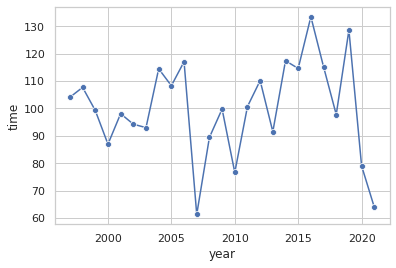

In [12]:
# Average record time across the year
avgYear = (records.groupby(['year', 'time'], as_index=False).mean()
            .groupby('year')['time'].mean())

avgYear = avgYear.reset_index()

sns.lineplot(x="year", y='time', marker="o", data=avgYear)

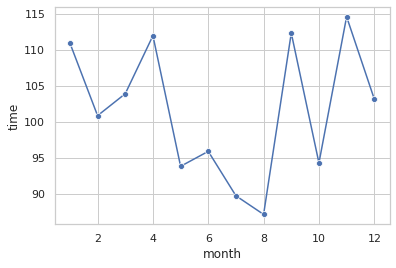

In [13]:
# Monthly average
avg_monthly = records[['month', 'year', 'time']]
avg_monthly_yearly = (avg_monthly.groupby(['month','time'], as_index=False).mean()
            .groupby('month')['time'].mean())
avg_monthly_yearly = avg_monthly_yearly.reset_index()

sns.lineplot(x="month", y='time', marker="o", data=avg_monthly_yearly)

## Track is the fastest

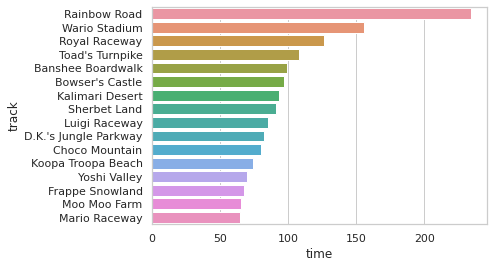

In [14]:
recordsTrack = records[['track', "type", "time", "year", "month"]]
trackOverall = recordsTrack[['track', 'type' ,'year', "time"]]
overallAvgTrack = trackOverall.groupby(['track', "time"], as_index=False).mean().groupby("track")['time'].mean()
overallAvgTrack = overallAvgTrack.reset_index()

sns.barplot(y="track", x='time', order = overallAvgTrack.sort_values('time', ascending=False).track ,data=overallAvgTrack)

In [15]:
overallAvg = recordsTrack.groupby(['track', "type", "year"], as_index=False).agg({'time':'mean'})

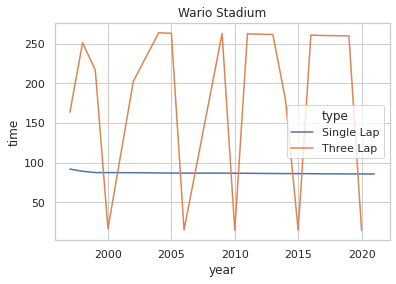

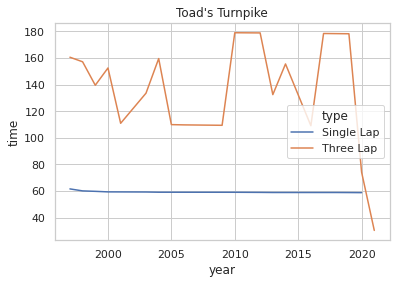

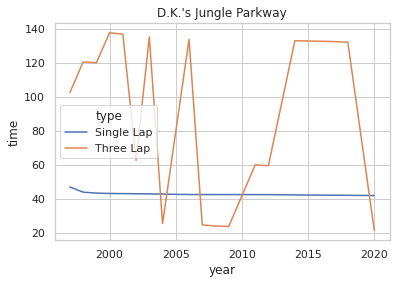

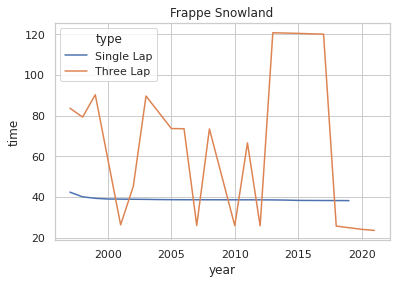

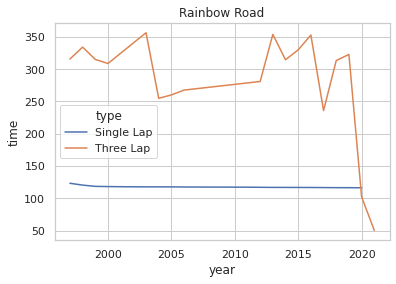

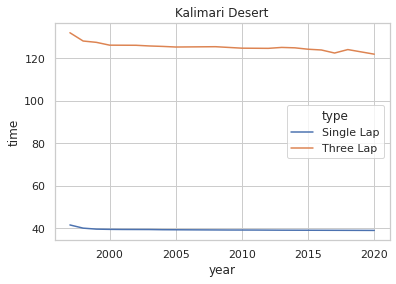

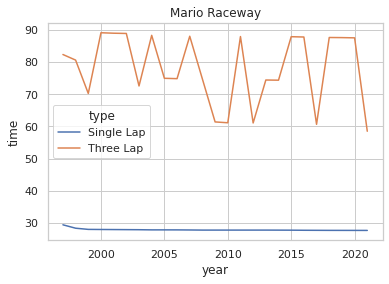

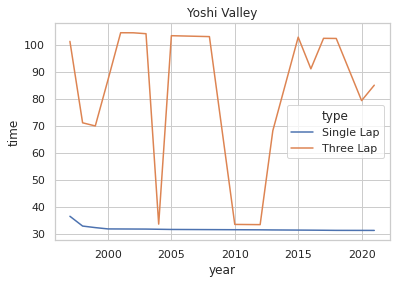

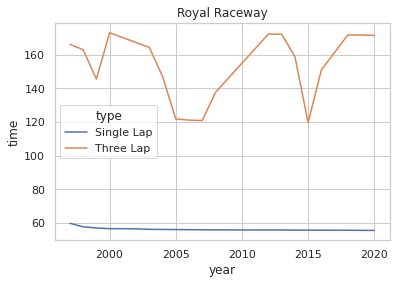

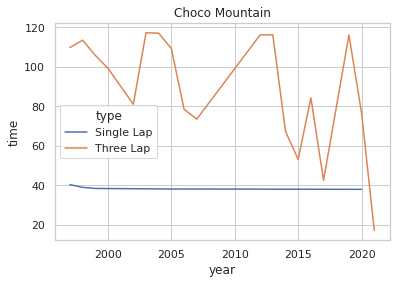

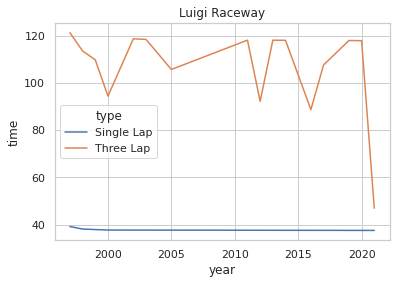

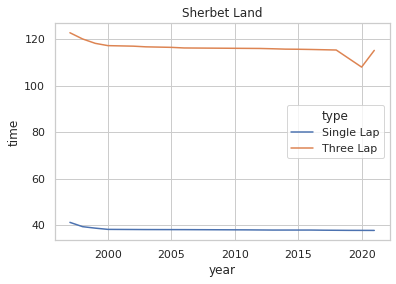

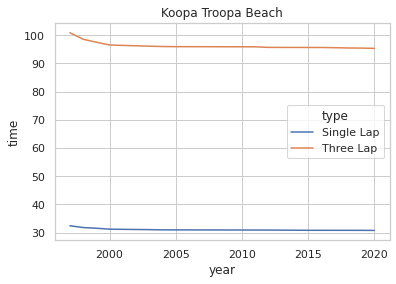

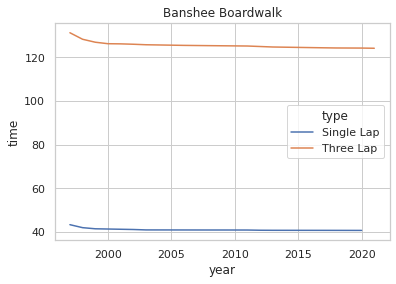

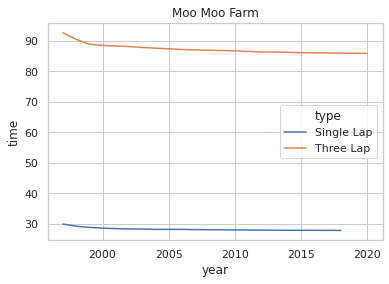

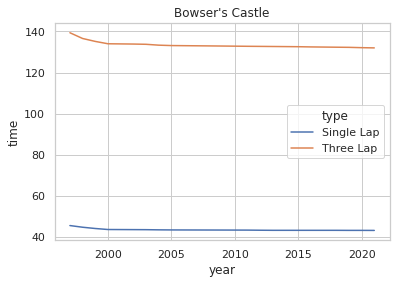

In [16]:
track_list = ["Wario Stadium","Toad's Turnpike","D.K.'s Jungle Parkway","Frappe Snowland","Rainbow Road","Kalimari Desert","Mario Raceway",
              "Yoshi Valley","Royal Raceway","Choco Mountain","Luigi Raceway","Sherbet Land","Koopa Troopa Beach","Banshee Boardwalk",
              "Moo Moo Farm","Bowser's Castle"]

for i in track_list:
  df = overallAvg[overallAvg["track"]==i]
  plt.figure()
  sns.lineplot(data=df, x="year", y="time", hue="type").set_title(i)

In [18]:
overallAvgMinMax = recordsTrack.groupby(['track'], as_index=False).agg({'time':['mean', 'min', 'max']})
overallAvgMinMax


track        time               
                                 mean    min     max
0       Banshee Boardwalk   97.440602  40.78  135.94
1         Bowser's Castle   96.228116  43.15  141.22
2          Choco Mountain   70.786216  17.29  127.96
3   D.K.'s Jungle Parkway   70.985500  21.35  156.44
4         Frappe Snowland   58.590222  23.61  131.43
5         Kalimari Desert   76.911302  38.96  134.22
6      Koopa Troopa Beach   72.414831  30.78  102.01
7           Luigi Raceway   74.320816  25.30  132.99
8           Mario Raceway   54.195875  27.62   95.06
9            Moo Moo Farm   61.069012  27.80   95.48
10           Rainbow Road  205.273352  50.38  375.83
11          Royal Raceway  109.207785  55.50  187.19
12           Sherbet Land   78.143706  37.72  124.00
13        Toad's Turnpike   98.878878  30.31  190.12
14          Wario Stadium  132.035373  14.59  280.34
15           Yoshi Valley   55.580563  31.25  120.65

In [21]:
overallAvgYear = recordsTrack.groupby(['track', "year"], as_index=False).agg({'time':['mean', 'min', 'max']})
overallAvgYear.sort_values(by="year")

track  year       time               
                                       mean    min     max
0        Banshee Boardwalk  1997  98.290000  42.47  135.94
57   D.K.'s Jungle Parkway  1997  72.276364  29.90  156.44
80         Frappe Snowland  1997  67.164000  28.15  131.43
104        Kalimari Desert  1997  76.346154  40.71  134.22
125     Koopa Troopa Beach  1997  73.490000  32.09  102.01
..                     ...   ...        ...    ...     ...
299          Wario Stadium  2021  85.845000  85.82   85.87
182          Mario Raceway  2021  33.794000  27.62   58.49
279        Toad's Turnpike  2021  30.310000  30.31   30.31
103        Frappe Snowland  2021  23.630000  23.61   23.65
318           Yoshi Valley  2021  67.063333  31.25  102.20

[319 rows x 5 columns]

In [25]:
overallAvgType = recordsTrack.groupby(['track', "type"], as_index=False).agg({'time':['mean', 'min', 'max']})
overallAvgType

track        type        time                
                                             mean     min     max
0       Banshee Boardwalk  Single Lap   41.496071   40.78   44.71
1       Banshee Boardwalk   Three Lap  125.921455  124.09  135.94
2         Bowser's Castle  Single Lap   44.034483   43.15   46.06
3         Bowser's Castle   Three Lap  134.068500  132.00  141.22
4          Choco Mountain  Single Lap   38.795312   38.02   42.04
5          Choco Mountain   Three Lap   95.160238   17.29  127.96
6   D.K.'s Jungle Parkway  Single Lap   43.157234   42.04   50.07
7   D.K.'s Jungle Parkway   Three Lap  101.402442   21.35  156.44
8         Frappe Snowland  Single Lap   39.207727   38.27   44.10
9         Frappe Snowland   Three Lap   77.130000   23.61  131.43
10        Kalimari Desert  Single Lap   39.640208   38.96   42.25
11        Kalimari Desert   Three Lap  125.925342  121.92  134.22
12     Koopa Troopa Beach  Single Lap   31.299091   30.78   32.79
13     Koopa Troopa Beach   Three Lap   96.643750   95.25  102.01
14          Luigi Raceway  Single Lap   38.084848   37.58   40.40
15          Luigi Raceway   Three Lap  103.846420   25.30  132.99
16          Mario Raceway  Single Lap   27.964103   27.62   30.02
17          Mario Raceway   Three Lap   79.148049   58.49   95.06
18           Moo Moo Farm  Single Lap   28.554324   27.80   30.29
19           Moo Moo Farm   Three Lap   88.410909   85.93   95.48
20           Rainbow Road  Single Lap  118.202500  116.35  124.54
21           Rainbow Road   Three Lap  275.633636   50.38  375.83
22          Royal Raceway  Single Lap   56.644167   55.50   60.85
23          Royal Raceway   Three Lap  158.358182  119.49  187.19
24           Sherbet Land  Single Lap   38.790857   37.72   42.70
25           Sherbet Land   Three Lap  115.879315   91.65  124.00
26        Toad's Turnpike  Single Lap   59.631944   58.69   62.84
27        Toad's Turnpike   Three Lap  121.667419   30.31  190.12
28          Wario Stadium  Single Lap   87.292615   85.82   92.77
29          Wario Stadium   Three Lap  213.958732   14.59  280.34
30           Yoshi Valley  Single Lap   32.261395   31.25   39.49
31           Yoshi Valley   Three Lap   82.681216   33.35  120.65

In [42]:
recordsShort = records[records['shortcut']=="Yes"]
recordsShort = pd.unique(recordsShort['track'])
recordsShort

array(['Luigi Raceway', 'Kalimari Desert', "Toad's Turnpike",
       'Frappe Snowland', 'Choco Mountain', 'Mario Raceway',
       'Wario Stadium', 'Sherbet Land', 'Royal Raceway',
       "D.K.'s Jungle Parkway", 'Yoshi Valley', 'Rainbow Road'],
      dtype=object)

In [43]:
recordsShortYear = records[records['shortcut']=="Yes"]
recordsShortYear = recordsShortYear[['track', 'type', "date", "time"]]
recordsShortYear

,track,type,date,time
83,Luigi Raceway,Three Lap,1997-05-20,117.05
84,Luigi Raceway,Three Lap,1997-06-24,102.79
85,Luigi Raceway,Three Lap,1997-08-30,101.10
86,Luigi Raceway,Three Lap,1998-01-02,99.75
87,Luigi Raceway,Three Lap,1998-09-02,98.97
...,...,...,...,...
2329,Rainbow Road,Single Lap,2018-04-13,116.56
2330,Rainbow Road,Single Lap,2019-04-06,116.53
2331,Rainbow Road,Single Lap,2019-04-10,116.52
2332,Rainbow Road,Single Lap,2020-06-11,116.48


In [44]:
recordsShortYear.groupby(['date'], as_index=False).agg({'time':['min']})

,date,time
,,min
0,1997-02-16,40.40
1,1997-03-07,39.49
2,1997-03-10,30.02
3,1997-03-12,183.96
4,1997-03-17,153.51
...,...,...
602,2021-02-11,25.30
603,2021-02-14,30.31
604,2021-02-19,37.72
